In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils
import math
import matplotlib.patches as patches
import time

import scipy

In [2]:
import importlib  

module = importlib.import_module('4) compute_quality_parameters')
compute_quality_parameters = module.compute_quality_parameters

In [3]:
def compute_quality_parameters_aux(image_path):
    print('Image path:', image_path)
    print()
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
    plt.figure()
    plt.imshow(gray, 'gray')
    plt.title('Original image') 

    overall_quality_parameters_dict = compute_quality_parameters(image, visualize_scanlines_onRoiImage=True, 
                                                                 visualize_scanlines_qualityParameters=True,
                                                                verbose_timing=True)
    
    n_scanlines = 10
    print('Scanline grades:', [overall_quality_parameters_dict[f'scanline_{i}']['scanline_min_grade'] 
                               for i in range(n_scanlines)])

    print('OVERALL_NUMERICAL_VALUE:', overall_quality_parameters_dict['OVERALL_NUMERICAL_VALUE'])
    print('OVERALL_NUMERICAL_GRADE:', overall_quality_parameters_dict['OVERALL_NUMERICAL_GRADE'])
    print()

    print('R_min_MEAN:', overall_quality_parameters_dict['R_min_MEAN'])
    print('R_min_MEAN_grade:', overall_quality_parameters_dict['R_min_MEAN_grade'])
    print()

    print('SC_MEAN:', overall_quality_parameters_dict['SC_MEAN'])
    print('SC_MEAN_grade:', overall_quality_parameters_dict['SC_MEAN_grade'])
    print()

    print('EC_min_MEAN:', overall_quality_parameters_dict['EC_min_MEAN'])
    print('EC_min_MEAN_grade:', overall_quality_parameters_dict['EC_min_MEAN_grade'])
    print()

    print('MODULATION_MEAN:', overall_quality_parameters_dict['MODULATION_MEAN'])
    print('MODULATION_MEAN_grade:', overall_quality_parameters_dict['MODULATION_MEAN_grade'])
    print()

    print('DEFECT_MEAN:', overall_quality_parameters_dict['DEFECT_MEAN'])
    print('DEFECT_MEAN_grade:', overall_quality_parameters_dict['DEFECT_MEAN_grade'])
    
    return overall_quality_parameters_dict

In [4]:
from os import listdir
from os.path import isfile, join
images_paths = [f for f in listdir('../images') if isfile(join('../images', f))]

Wall time: 0 ns
Image path: ../images/C128_4.4LOW.BMP

Computing quality parameters time: 0.16457724571228027

Scanline grades: ['D', 'C', 'D', 'F', 'D', 'D', 'D', 'D', 'F', 'D']
OVERALL_NUMERICAL_VALUE: 0.9
OVERALL_NUMERICAL_GRADE: D

R_min_MEAN: 8.352941176470587
R_min_MEAN_grade: A

SC_MEAN: 73.37254901960783
SC_MEAN_grade: A

EC_min_MEAN: 40.196078431372555
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.5485784136717923
MODULATION_MEAN_grade: C

DEFECT_MEAN: 0.27430877621030425
DEFECT_MEAN_grade: D


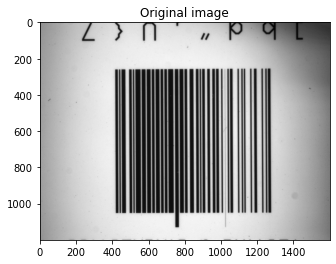

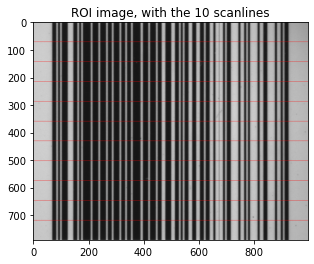

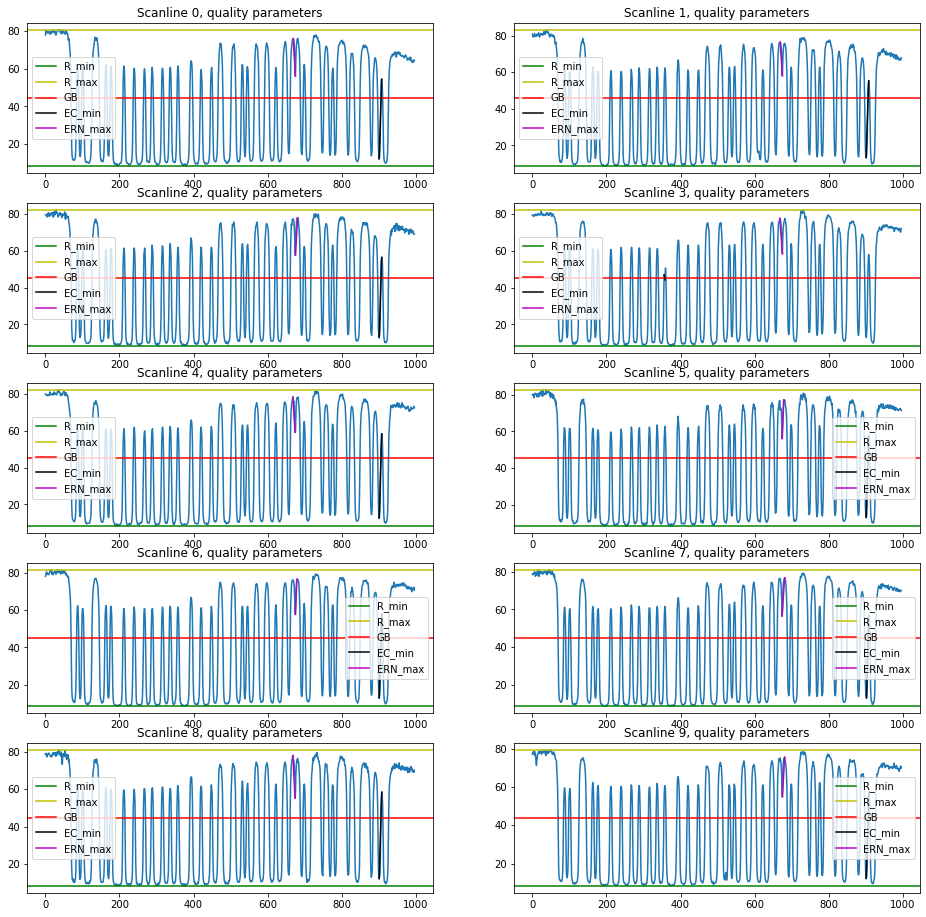

In [8]:
# TEST CHART MODULATION: 55.2, 62.1. GRADE 'C' (Between 'C' and 'B')
# MINE MODULATION: 54.85 GRADE 'C'
# OK

%time
%matplotlib inline
overall_quality_parameters_dict = compute_quality_parameters_aux(f'../images/{images_paths[0]}')